# MNIST Digit Classification using Deep Learning

Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images
<br>
Returns
<br>
- Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).
x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
- y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
- x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
- y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of the np arrays
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Telling it contains 60k img with dimension of 28 X 28 having gray scale img and label for all this are stored in y

In [5]:
# Printing the 10th img
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


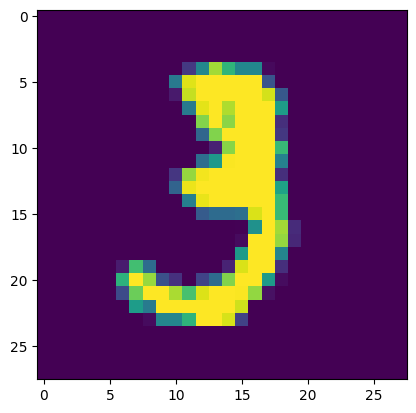

3


In [7]:
plt.imshow(X_train[10])
plt.show()


# Printing the corresponding label
print(y_train[10])

Image Labels

In [8]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [9]:
# Unique Values
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this labels as such or we can also apply one hot encoding

All the img is having the same dimension in this dataset. if not we have to resize all this images to a common dimension

In [10]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
# Checking
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the neural network**

In [12]:
# Setting up some layers for the neural network

model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ]
)

C:\Users\acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compiling the model
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'] 
             )

In [14]:
# Training the model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9162 - loss: 0.2911
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9604 - loss: 0.1342
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9703 - loss: 0.0996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9757 - loss: 0.0800
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9798 - loss: 0.0664
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0563
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0475
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0404
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9890 - loss: 0.0355
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9899 - loss: 0.0319


Training data accuracy is - 98.9%
<br>
Accuracy on test data

In [16]:
loss, accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9657 - loss: 0.1314
0.9656999707221985


Here now the testing data accuracy is - 96.5%

In [17]:
print(X_test.shape)

(10000, 28, 28)


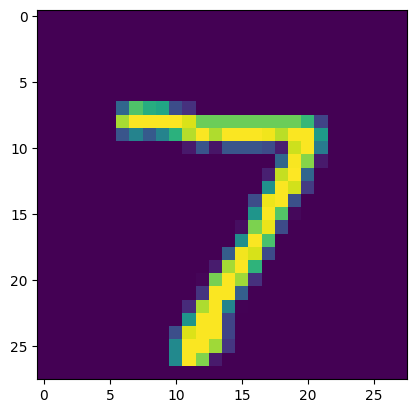

7


In [19]:
# First data pint in X test
plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [20]:
# Making the predictions made by model
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


In [22]:
print(y_pred.shape)

(10000, 10)


In [21]:
print(y_pred)

[[5.8726746e-06 8.1271504e-04 4.1480828e-02 ... 9.9999988e-01
  6.5454647e-02 9.8407173e-01]
 [3.4383112e-03 9.7695684e-01 1.0000000e+00 ... 7.4183197e-05
  9.0448726e-03 1.8996498e-09]
 [1.2998051e-03 9.9987489e-01 3.7862504e-01 ... 5.4973614e-01
  2.3597898e-01 4.7905073e-02]
 ...
 [2.0817039e-07 3.4567699e-06 9.8065427e-04 ... 9.8560482e-01
  2.6223892e-01 9.9904621e-01]
 [4.7895426e-04 3.5340137e-05 1.8949746e-05 ... 1.6144599e-05
  9.9995327e-01 1.9536649e-03]
 [1.3619796e-03 9.3391645e-06 6.8135101e-01 ... 1.6074242e-10
  1.5655984e-06 2.3691661e-03]]


In [23]:
print(y_pred[0])

[5.8726746e-06 8.1271504e-04 4.1480828e-02 9.8583668e-01 2.5605519e-07
 1.1381475e-03 1.9385359e-13 9.9999988e-01 6.5454647e-02 9.8407173e-01]


Here i think we need to do argmax for the values of prediction as its of probability

In [25]:
y_argmax = [np.argmax(i) for i in y_pred]
print(y_argmax)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(2), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [27]:
# printing the first prediction
print(y_argmax[0])

7


Confusion matrix

In [31]:
conf_matrix = confusion_matrix(y_test,y_argmax)
print(conf_matrix)

tf.Tensor(
[[ 947    0    0    1    2    5   10    1    3   11]
 [   0 1110    3    4    4    0    4    2    8    0]
 [   5    0  984   16    9    0    5    5    7    1]
 [   0    0    3  980    2   10    0    4    0   11]
 [   0    0    2    0  959    0    6    3    0   12]
 [   3    0    0   10    2  862   10    1    2    2]
 [   1    3    2    2    7    7  935    0    1    0]
 [   1    0   12    1    3    0    0  993    2   16]
 [   1    0    2   17    5    8   10    5  912   14]
 [   2    2    0    4   15    5    1    3    1  976]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

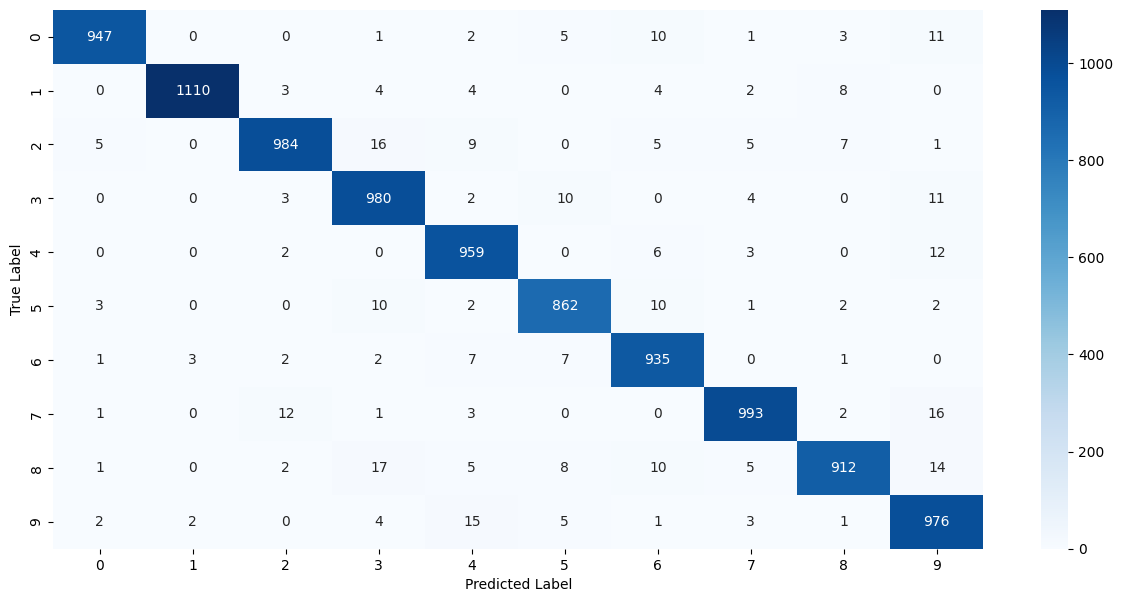

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Predictive System

In [52]:
# Img Path
# input_img_path = input("Path of the img to be predicted: ")
input_img_path = 'data/MNIST_digit.png'

# Reading the img
input_img = cv2.imread(input_img_path)

# Show the img
# cv2.imshow('Given input',input_img)
# cv2.waitKey(0)

# Printing the shape of the img
# print(f"The dimensions of the image is : {input_img.shape}")

# Converting the img to gray scale img
img_gray = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)

# Printing the shape of the gray scale img
# print(f"The dimensions of the gray image is : {img_gray.shape}")

# Resizing the img
img_resized = cv2.resize(img_gray,(28,28))

# Printing the shape of the resized img
# print(f"The dimensions of the resized image is : {img_resized.shape}")

# Standardizing the values
img_scaled = img_resized/255

# Expanding the dimensions
img_reshaped = np.reshape(img_scaled,[1,28,28])

# Predicting the value using the model
y_predicted = model.predict(img_reshaped)

# Printing the value of the prediction
# print(y_predicted)

# Arg Max value
y_argmax_pred = [np.argmax(y_predicted)]

# printing the output
print(f"The given img will be probably of number : {y_argmax_pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The given img will be probably of number : 3
